# Tool comparison

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as transforms
import glob

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------

# Read results of individual analysis

In [3]:
result_files = glob.glob("results/*")
result_files = [f for f in result_files if "merged_results.tsv" not in f]

In [4]:
result_files

['results/covid_propeller_rep_arcsin.tsv',
 'results/covid_propeller_rep_logit.tsv',
 'results/covid_scanpro_norep_arcsin.tsv',
 'results/covid_scanpro_norep_logit.tsv',
 'results/covid_scanpro_rep_arcsin.tsv',
 'results/covid_scanpro_rep_logit.tsv',
 'results/covid_sccoda_norep.tsv',
 'results/covid_sccoda_rep.tsv',
 'results/heart_propeller_rep_arcsin.tsv',
 'results/heart_propeller_rep_logit.tsv',
 'results/heart_scanpro_norep_arcsin.tsv',
 'results/heart_scanpro_norep_logit.tsv',
 'results/heart_scanpro_rep_arcsin.tsv',
 'results/heart_scanpro_rep_logit.tsv',
 'results/heart_sccoda_norep.tsv',
 'results/heart_sccoda_rep.tsv',
 'results/humanMI_propeller_rep_arcsin.tsv',
 'results/humanMI_propeller_rep_logit.tsv',
 'results/humanMI_scanpro_norep_arcsin.tsv',
 'results/humanMI_scanpro_norep_logit.tsv',
 'results/humanMI_scanpro_rep_arcsin.tsv',
 'results/humanMI_scanpro_rep_logit.tsv',
 'results/pbmc_propeller_rep_arcsin.tsv',
 'results/pbmc_propeller_rep_logit.tsv',
 'results/pbmc_s

In [5]:
rows = []
for f in result_files:
    
    base = os.path.splitext(os.path.basename(f))[0]
    elements = base.split("_")
    element_names = ["dataset", "tool", "replicates", "transform", "conditions"]
    
    if elements[2] not in ["norep", "rep"]:
        continue
    
    info = {}
    for i, element in enumerate(elements):
        info[element_names[i]] = element
    
    # Add p-value/props
    results = pd.read_csv(f, sep="\t")
    
    #Get max of covariates if sccoda
    if "sccoda" in base:
        results = results.groupby("Cell Type")["credible_effect"].max().to_frame().reset_index()
    
    for i, row in results.iterrows():
        info_row = info.copy()
        
        if "sccoda" in base:
            info_row["cluster"] = row.iloc[0]
            
            info_row["credible_effect"] = row["credible_effect"]
            info_row["compare_value"] = int(info_row["credible_effect"])
            info_row["significant"] = info_row["credible_effect"]
            
        else:
            info_row["cluster"] = row.iloc[0]
            info_row["baseline_props"] = row.iloc[1] if "scanpro" in base else row.iloc[2]
            info_row["p-value"] = row.iloc[-2]
            info_row["FDR"] = row.iloc[-1]
            info_row["significant"] = info_row["FDR"] < 0.05

            info_row["compare_value"] = -np.log10(info_row["FDR"])
            if info_row["compare_value"] == np.inf:
                info_row["compare_value"] = 20

        rows.append(info_row)

/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_value"] = -np.log10(info_row["FDR"])
/tmp/ipykernel_31618/3981158319.py:39: RuntimeWarning: divide by zero encountered in log10
  info_row["compare_v

In [6]:
results = pd.DataFrame(rows)

In [7]:
results

,dataset,tool,replicates,transform,cluster,baseline_props,p-value,FDR,significant,compare_value,credible_effect,conditions
0,covid,propeller,rep,arcsin,pDC,0.001134,0.007892,0.028010,True,1.552683,NaN,NaN
1,covid,propeller,rep,arcsin,Neutrophil,-0.000000,0.008007,0.028010,True,1.552683,NaN,NaN
2,covid,propeller,rep,arcsin,NK cells,0.008894,0.008403,0.028010,True,1.552683,NaN,NaN
3,covid,propeller,rep,arcsin,T cells,0.094594,0.023311,0.054665,False,1.262288,NaN,NaN
4,covid,propeller,rep,arcsin,mDC,0.023776,0.027333,0.054665,False,1.262288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
581,scatac,scanpro,rep,logit,Astrocytes/Oligodendrocytes,0.011484,1.000000,1.000000,False,-0.000000,NaN,heart-muscle
582,scatac,scanpro,rep,logit,SKOR2_NPSR1 positive cells,0.006433,1.000000,1.000000,False,-0.000000,NaN,heart-muscle
583,scatac,scanpro,rep,logit,Limbic system neurons,0.004416,1.000000,1.000000,False,-0.000000,NaN,heart-muscle
584,scatac,scanpro,rep,logit,ENS neurons,0.004862,1.000000,1.000000,False,-0.000000,NaN,heart-muscle


In [8]:
results.to_csv("results/merged_results.tsv", sep="\t")

In [9]:
results["dataset"].unique()

array(['covid', 'heart', 'humanMI', 'pbmc', 'scatac'], dtype=object)

----------

# Compare results per dataset

In [10]:
datasets = ["pbmc", "heart", "covid"]

In [11]:
results_compare = results.copy()
results_compare = results_compare[results_compare["dataset"].isin(datasets)]
results_compare["tool_rep_transform"] = results_compare["tool"] + "_" + results_compare["replicates"] + "_" + results_compare["transform"].fillna("")

In [12]:
results_compare

,dataset,tool,replicates,transform,cluster,baseline_props,p-value,FDR,significant,compare_value,credible_effect,conditions,tool_rep_transform
0,covid,propeller,rep,arcsin,pDC,0.001134,0.007892,0.028010,True,1.552683,NaN,NaN,propeller_rep_arcsin
1,covid,propeller,rep,arcsin,Neutrophil,-0.000000,0.008007,0.028010,True,1.552683,NaN,NaN,propeller_rep_arcsin
2,covid,propeller,rep,arcsin,NK cells,0.008894,0.008403,0.028010,True,1.552683,NaN,NaN,propeller_rep_arcsin
3,covid,propeller,rep,arcsin,T cells,0.094594,0.023311,0.054665,False,1.262288,NaN,NaN,propeller_rep_arcsin
4,covid,propeller,rep,arcsin,mDC,0.023776,0.027333,0.054665,False,1.262288,NaN,NaN,propeller_rep_arcsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,pbmc,sccoda,rep,NaN,B cells,NaN,NaN,NaN,False,0.000000,False,NaN,sccoda_rep_
252,pbmc,sccoda,rep,NaN,Dendritic cells,NaN,NaN,NaN,False,0.000000,False,NaN,sccoda_rep_
253,pbmc,sccoda,rep,NaN,Monocytes,NaN,NaN,NaN,False,0.000000,False,NaN,sccoda_rep_
254,pbmc,sccoda,rep,NaN,NK cells,NaN,NaN,NaN,True,1.000000,True,NaN,sccoda_rep_


In [13]:
plot_title = {"pbmc": "PBMC male vs. female", 
              "heart": "Heart development", 
              "covid": "COVID-19 severity",
              "scatac": "Fetal scATAC cell atlas"}

In [14]:
value_table = results_compare.pivot(columns="tool_rep_transform", index=["dataset", "cluster"], values="compare_value")
value_table["propeller_norep"] = np.nan

In [15]:
value_table

tool_rep_transform           propeller_rep_arcsin  propeller_rep_logit  \
dataset cluster                                                          
covid   B cells                          0.873450             0.776313   
        Epithelial                       0.083308             0.623910   
        Macrophages                      0.381487             0.604167   
        Mast                             0.020118             0.290126   
        NK cells                         1.552683             1.456743   
        Neutrophil                       1.552683             5.450204   
        Plasma                           0.381487             1.987865   
        T cells                          1.262288             0.888150   
        mDC                              1.262288             0.776313   
        pDC                              1.552683             1.456743   
heart   Cardiomyocytes                   1.174507             3.512313   
        Endothelial cells                0.278134             0.147701   
        Epicardial cells                 0.278134             0.270177   
        Erythroid                        3.043311            19.331558   
        Fibroblast                       1.012994             1.710098   
        Immune cells                     1.349256             4.424939   
        Neurons                          0.547356             0.455680   
        Smooth muscle cells              0.035357             0.147701   
pbmc    B cells                          0.058042             0.089344   
        Dendritic cells                  0.329627             0.307783   
        Monocytes                        0.031777             0.022571   
        NK cells                         0.844586             1.307851   
        T cells                          0.464393             0.423156   

tool_rep_transform           scanpro_norep_arcsin  scanpro_norep_logit  \
dataset cluster                                                          
covid   B cells                          1.009196             0.869836   
        Epithelial                       0.906419             0.524138   
        Macrophages                      4.144060             1.617678   
        Mast                             0.184710             0.315833   
        NK cells                         3.178081             2.151845   
        Neutrophil                       8.750002             8.590483   
        Plasma                           5.673712             5.423214   
        T cells                          6.457579             2.497886   
        mDC                              0.761550             0.550213   
        pDC                              1.618654             1.438113   
heart   Cardiomyocytes                   8.457227             3.256918   
        Endothelial cells                0.680625             0.476002   
        Epicardial cells                 1.027859             0.677900   
        Erythroid                        1.939830             3.310644   
        Fibroblast                       3.556456             1.784904   
        Immune cells                     4.924050             2.446316   
        Neurons                          0.501809             0.305467   
        Smooth muscle cells              0.204610             0.151409   
pbmc    B cells                          0.288661             0.317793   
        Dendritic cells                  0.299925             0.407756   
        Monocytes                        0.276104             0.306108   
        NK cells                         1.542786             1.149497   
        T cells                          1.284639             0.979621   

tool_rep_transform           scanpro_rep_arcsin  scanpro_rep_logit  \
dataset cluster                                                      
covid   B cells                        1.167908           0.971400   
        Epithelial                     0.088891           0.602098   
        Macrophage

In [16]:
annot_table = results_compare.pivot(columns="tool_rep_transform", index=["dataset", "cluster"], values="significant")
annot_table.replace({True: "*", False: ""}, inplace=True)
annot_table["propeller_norep"] = "NA"

In [17]:
def join_xticks(fig, ax, label):
    """ Add horizontal bar to join x axis labels in heatmap """
    
    ticks = ax.xaxis.get_major_ticks()
    ticks = [tick for tick in ticks if tick.label1._text == label]
    
    # Convert from display -> converted coordinates
    trans_y = ax.transData
    trans_y_inv = trans_y.inverted()                                      
    tick_bboxes = [tick.tick1line.get_window_extent().transformed(trans_y_inv) for tick in ticks] 
    bbox_trans = tick_bboxes[0]
    
    #Plot horizontal line between ticks
    trans = transforms.blended_transform_factory(ax.transData, trans_y)
    tick_x = [tick._loc for tick in ticks]  # data coordinates
    tick_y = [bbox_trans.y0 + (bbox_trans.y0-bbox_trans.y1)/2]*2  #converted coordinates + half length
    ax.plot(tick_x, tick_y, color="black", lw=0.8, transform=trans, clip_on=False)

    # Move labels using transform
    dx = 0.1
    offset = transforms.ScaledTranslation(dx, 0, fig.dpi_scale_trans)
    ticks[0].label1.set_transform(ticks[0].label1.get_transform() + offset)
    _ = [tick.label1.set_visible(False) for tick in ticks[1:]]

/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


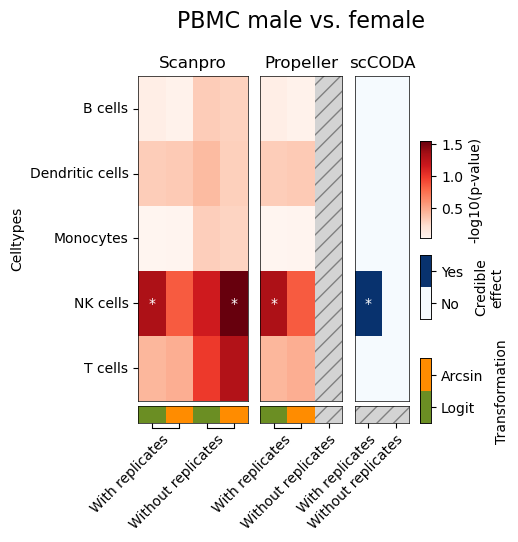

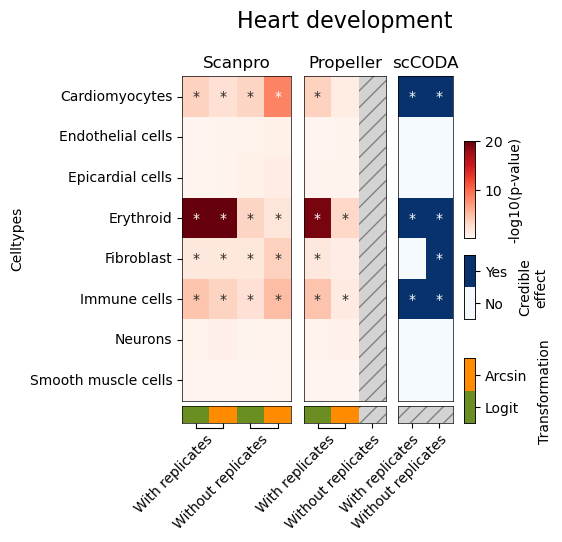

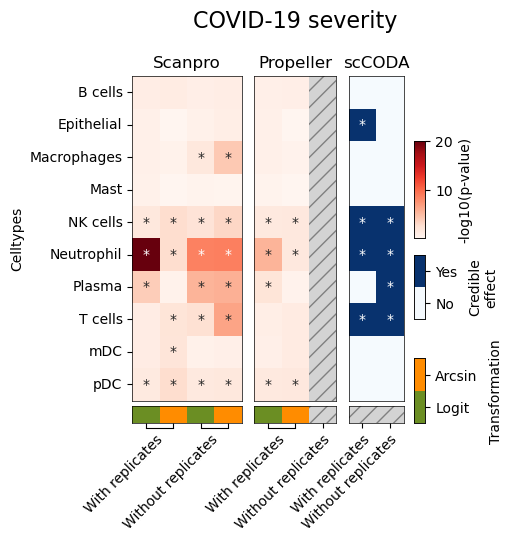

In [18]:
for dataset in datasets:
    
    # Get data
    values = value_table.query(f"dataset == '{dataset}'").reset_index(level=0, drop=True)
    annot = annot_table.query(f"dataset == '{dataset}'").reset_index(level=0, drop=True)
    n_rows = len(values)
    
    # Initialize plotting grid
    fig, axarr = plt.subplots(2,3, figsize=(3.5, 4.5), gridspec_kw={'width_ratios': [4,3,2], 
                                                                    'height_ratios': [0.95,0.05]})
    axarr = axarr.flatten()
    plt.subplots_adjust(wspace=0.15, hspace=0.03)
    
    ############### Colorbars ################

    #Create extra axes for colorbars
    transform_colors = ["olivedrab", "darkorange"]
    ax = axarr[2]
    transform_cax = inset_axes(ax,
                               width="20%", height="20%",
                               loc='lower left',
                               bbox_to_anchor=(1.2, -0.07, 1, 1),
                               bbox_transform=ax.transAxes, borderpad=0)
    transform_cax.set_frame_on(True)
    
    pvalue_cax = inset_axes(ax,
                            width="20%", height="30%",
                            loc='lower left',
                            bbox_to_anchor=(1.2, 0.5, 1, 1),
                            bbox_transform=ax.transAxes, borderpad=0)
    pvalue_cax.set_frame_on(True)
    
    percent_cax = inset_axes(ax,
                             width="20%", height="20%",
                             loc='lower left',
                             bbox_to_anchor=(1.2, 0.25, 1, 1),
                             bbox_transform=ax.transAxes, borderpad=0)
    percent_cax.set_frame_on(True)

    #Get max p-value to set for scanpro/propeller
    max_value = values.max().max()  
    
    ########## Scanpro ##########
    columns = ["scanpro_rep_logit", "scanpro_rep_arcsin", "scanpro_norep_logit", "scanpro_norep_arcsin"]
    
    # First row
    ax = axarr[0]
    sns.heatmap(values[columns], 
                annot=annot[columns], fmt='',
                ax=ax, cmap='Reds', vmax=max_value, cbar_ax=pvalue_cax, xticklabels=False, 
                cbar_kws={"label": "-log10(p-value)"})

    # Second row
    ax = axarr[3]
    sns.heatmap([[0,1,0,1]], ax=ax, cbar_ax=transform_cax, 
                yticklabels=False, 
                cmap=transform_colors)

    #Transformation to categorical
    colorbar = axarr[3].collections[0].colorbar
    colorbar.set_label("Transformation", labelpad=8)
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(["Logit", "Arcsin"])
    
    #xticks
    ax.set_xticks(ax.get_xticks(), ["With replicates",  "With replicates", "Without replicates", "Without replicates"], 
                  rotation=45, ha='right', rotation_mode='anchor')
    join_xticks(fig, ax, "With replicates")
    join_xticks(fig, ax, "Without replicates")

    ########## Propeller ##########
    columns = ["propeller_rep_logit", "propeller_rep_arcsin", "propeller_norep"]

    # First row
    ax = axarr[1]
    g = sns.heatmap(values[columns],
                    annot=annot[columns], fmt='',
                    ax=ax, yticklabels=False, xticklabels=False,
                    cmap='Reds', cbar=False, vmax=max_value)    
    
    # Second row
    ax = axarr[4]
    sns.heatmap([[0,1,np.nan]], ax=ax, cbar=False, xticklabels=True, yticklabels=False, cmap=transform_colors)

    # xticks
    ax.set_xticks(ax.get_xticks(), ["With replicates",  "With replicates", "Without replicates"], rotation=45, ha='right', rotation_mode='anchor')
    join_xticks(fig, ax, "With replicates")
    
    ########## Sccoda ##########
    columns = ["sccoda_rep_", "sccoda_norep_"]
    
    # First row
    ax = axarr[2]
    colors = sns.color_palette("Blues", n_colors=100).as_hex()
    colors = [colors[0], colors[-1]]

    sns.heatmap(values[columns], 
                annot=annot[columns], fmt='',
                cmap=colors,
                ax=ax, yticklabels=False, xticklabels=False,
                cbar_ax=percent_cax,
                cbar_kws={"label": "Credible effect"})
    
    # Second row
    ax = axarr[5]
    #ax.axis("off")
    sns.heatmap([[np.nan, np.nan]], ax=ax, cbar=False, xticklabels=True, yticklabels=False) # no transformation
    
    #Ticks
    ax.set_xticks(ax.get_xticks(), ["With replicates",  "Without replicates"], rotation=45, ha='right', rotation_mode='anchor')
    
    #scCoda cmap to categorical
    colorbar = axarr[2].collections[0].colorbar
    colorbar.set_label("Credible\neffect", labelpad=8)
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(["No", "Yes"])
    
    
    ############ Final adjustments ##############
    
    #Titles
    axarr[0].set_title("Scanpro")
    axarr[1].set_title("Propeller")
    axarr[2].set_title("scCODA")
    
    ### Set format of labels
    for ax in axarr:
        ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')
        ax.set_ylabel("")
        ax.set_xlabel("")
        
        # Drawing the frame
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(0.5)
    
    _ = axarr[0].set_ylabel("Celltypes")
    
    #Border around cbars
    for cax in [pvalue_cax, percent_cax, transform_cax]:
        for _, spine in cax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(0.5)
            
    # Background for NAs
    for ax in axarr:
        ax.patch.set_facecolor('lightgrey')
        ax.patch.set_edgecolor('grey')
        ax.patch.set_hatch('//')
    
    # Set title of plot
    title = plot_title.get(dataset, dataset)
    axarr[1].text(0.5, 1.15, title, transform=axarr[1].transAxes, fontsize=16, ha="center")
    
    # Save final figure
    plt.savefig(f"{FIG_PATH}/{dataset}_tool_comparison.pdf", bbox_inches="tight")